# Tweet Analysis

## Table of Contents

- [Import Libraries](#import)
- [Gather Data](#gather)
- [Analysis](#analysis)

<a id = "import"></a>
## Import Libraries

In [8]:
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
from textblob import TextBlob
from config import *
import nltk
import re, string, unicodedata
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacobvoyles/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

<a id = "gather"></a>
## Gather Data

In [28]:
search_words = "climate+change -filter:retweets"
date_since = "2019-01-01"

In [9]:
def remove_URL(sample):
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)

In [26]:
d = []
vocabulary = []

tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
for tweet in tweets:
    new_text = preprocess(text)
    vocabulary.append(new_text)
    text = ' '.join(new_text)
    tblob = TextBlob(text)
    pol = tblob.polarity
    d.append({'Text': text, 'Polarity': pol})
    
df = pd.DataFrame(d)
df.head()

TweepError: Twitter error response: status code = 429

In [23]:
df = df[df['Polarity'] != 0]
df.head()

,Text,Polarity
1,realcarlvernon maximum climate change points d...,-0.200000
3,bitches like omg love matty talks environment ...,0.150000
6,scmpnews cmoireland shielding young ple freque...,-0.044444
9,business crypto mining climate change bad guy ...,-0.100000
13,redwardostan codingetudes bettikmartin statics...,0.100000


<a id= 'analysis'></a>
## Analysis

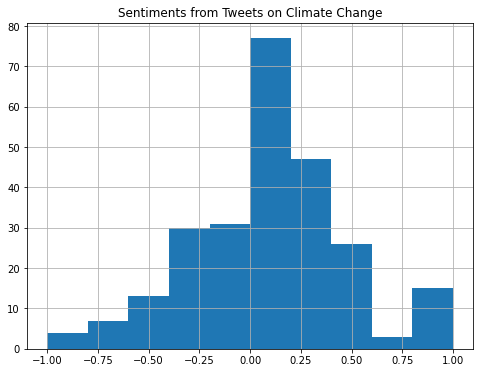

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
df.hist(ax=ax)

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [ ]:
tokens = [item for sublist in vocabulary for item in sublist]
print(len(tokens))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()